In [24]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


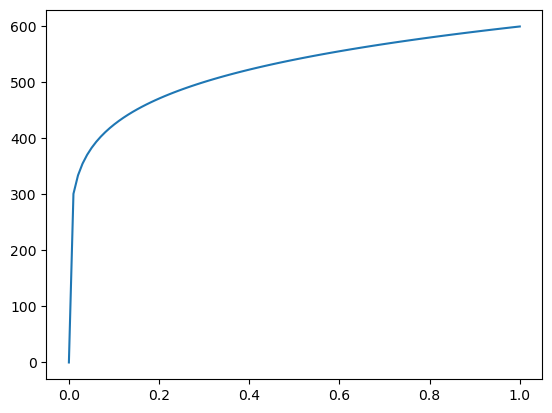

In [25]:
def compute_stress(K, n, x):
    return K * x ** n

K = 600
n = 0.15
x = np.linspace(0, 1, 100)
y = compute_stress(K, n, x)

plt.plot(x, y)

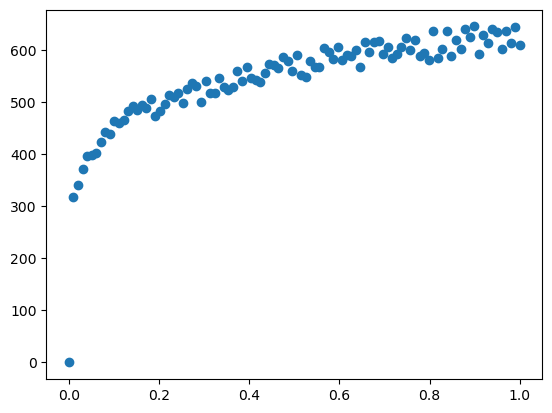

In [26]:
def generate_experimental_noisy_points(K, n, x):
    target = K * x ** n
    noise = 0.1 * np.random.random(100) * target
    return target + noise

K = 600
n = 0.15
x = np.linspace(0, 1, 100)
y_exp = generate_experimental_noisy_points(K, n, x)

plt.scatter(x, y_exp)

In [27]:
def mean_square_error(y, y_exp):
    return np.sum(np.abs(y - y_exp))

mean_square_error(y, y_exp)

2767.018353692839

In [28]:
def scale_parameters(K, n):
    # return scaled parameters between [0, 1] for gradient convergence optimization
    K_scale = ( K - 0 ) / ( 2000 - 0 )
    n_scale = ( n - 0.01 ) / ( 0.5 - 0.01 )
    return K_scale, n_scale

scale_parameters(600, 0.15)

def unscale_parameters(K_scale, n_scale):
    # return unscaled parameters between [min, max] for computing stress
    K = K_scale * ( 2000 - 0 ) + 0
    n = n_scale * ( 0.5 - 0.01 ) + 0.01
    return K, n
    
unscale_parameters(0.3, 0.2857142857142857)



(600.0, 0.15)

(10000,)
[[ 54604.28487427  52623.4576435   50642.63041273 ... 137535.9565105
  139516.78374127 141497.61097204]
 [ 54604.28487427  52632.81769184  50661.3505094  ... 136628.03182188
  138599.49900431 140570.96618675]
 [ 54604.28487427  52642.09342578  50679.90197729 ... 135728.28562957
  137690.47707807 139652.66852656]
 ...
 [ 54604.28487427  53252.43402413  51900.58317399 ...  76888.03558816
   78222.38662064  79556.73765312]
 [ 54604.28487427  53256.86351899  51909.44216371 ...  76490.83631376
   77821.09250835  79151.34870295]
 [ 54604.28487427  53261.26411623  51918.24335819 ...  76099.78725224
   77421.99571228  78748.17949059]]


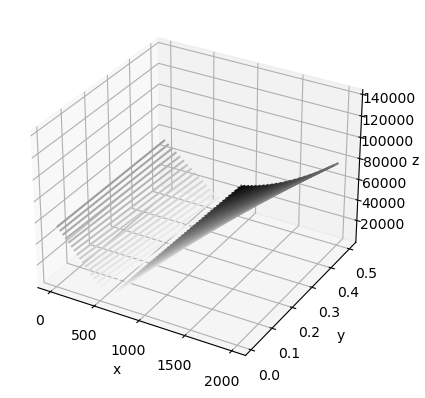

In [38]:
def plot_loss_function():
    K = np.linspace(0, 2000, 100)
    n = np.linspace(0.01, 0.5, 100)

    X, Y = np.meshgrid(K, n)
    zs = np.array(
        [mean_square_error(compute_stress(Ki, ni, x), y_exp) for Ki, ni in zip(np.ravel(X), np.ravel(Y))]
    )
    print(zs.shape)
    Z = zs.reshape(X.shape)
    print(Z)
    
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.contour3D(X, Y, Z, 50, cmap='binary')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

plot_loss_function()